在 PyTorch 中，构建神经网络通常需要继承 nn.Module 类。

nn.Module 是所有神经网络模块的基类，你需要定义以下两个部分：

__init__()：定义网络层。
forward()：定义数据的前向传播过程。

In [2]:
import torch
import torch.nn as nn

class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # 定义一个输入层到隐藏层的全连接层
        self.fc1 = nn.Linear(2, 2)  # 输入 2 个特征，输出 2 个特征
        # 定义一个隐藏层到输出层的全连接层
        self.fc2 = nn.Linear(2, 1)  # 输入 2 个特征，输出 1 个预测值
    def forward(self, x):
        # 前向传播过程
        x = torch.relu(self.fc1(x))  # 使用 ReLU 激活函数
        x = self.fc2(x)  # 输出层
        return x

# 创建模型实例
model = SimpleNN()

# 打印模型
print(model)

SimpleNN(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)


### PyTorch 提供了许多常见的神经网络层，以下是几个常见的：

nn.Linear(in_features, out_features)：全连接层，输入 in_features 个特征，输出 out_features 个特征。

nn.Conv2d(in_channels, out_channels, kernel_size)：2D 卷积层，用于图像处理。

nn.MaxPool2d(kernel_size)：2D 最大池化层，用于降维。

nn.ReLU()：ReLU 激活函数，常用于隐藏层。

nn.Softmax(dim)：Softmax 激活函数，通常用于输出层，适用于多类分类问题。

### 激活函数（Activation Function）

激活函数决定了神经元是否应该被激活。它们是非线性函数，使得神经网络能够学习和执行更复杂的任务。常见的激活函数包括：

Sigmoid：用于二分类问题，输出值在 0 和 1 之间。

Tanh：输出值在 -1 和 1 之间，常用于输出层之前。

ReLU（Rectified Linear Unit）：目前最流行的激活函数之一，定义为 f(x) = max(0, x)，有助于解决梯度消失问题。

Softmax：常用于多分类问题的输出层，将输出转换为概率分布。

In [5]:
import torch.nn.functional as F

# ReLU 激活
output = F.relu(input_tensor)

# Sigmoid 激活
output = torch.sigmod(input_tensor)

# tanh 激活
output = torch.tanh(input_tensor)

NameError: name 'input_tensor' is not defined

### 损失函数（Loss Function）

损失函数用于衡量模型的预测值与真实值之间的差异。

常见的损失函数包括：

均方误差（MSELoss）：回归问题常用，计算输出与目标值的平方差。

交叉熵损失（CrossEntropyLoss）：分类问题常用，计算输出和真实标签之间的交叉熵。

BCEWithLogitsLoss：二分类问题，结合了 Sigmoid 激活和二元交叉熵损失。

In [ ]:
# 均方误差损失
criterion = nn.MSELoss()

# 交叉熵损失
criterion = nn.CrossEntropyLoss()

# 二分类交叉熵损失
criterion = nn.BCEWithLogitsLoss()


# 使用 SGD 优化器
optimizer = optim.SGD(model.parameters(), lr=0.01)

# 使用 Adam 优化器
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# 假设已经定义好了模型、损失函数和优化器

# 训练数据示例
X = torch.randn(10, 2)  # 10 个样本，每个样本有 2 个特征
Y = torch.randn(10, 1)  # 10 个目标标签

# 训练过程
for epoch in range(100):  # 训练 100 轮
    model.train()  # 设置模型为训练模式
    optimizer.zero_grad()  # 清除梯度
    output = model(X)  # 前向传播
    loss = criterion(output, Y)  # 计算损失
    loss.backward()  # 反向传播
    optimizer.step()  # 更新权重
    
    if (epoch + 1) % 10 == 0:  # 每 10 轮输出一次损失
        print(f'Epoch [{epoch + 1}/100], Loss: {loss.item():.4f}')

本章节我们将介绍如何用 PyTorch 实现一个简单的前馈神经网络，完成一个二分类任务。

以下实例展示了如何使用 PyTorch 实现一个简单的神经网络进行二分类任务训练。

网络结构包括输入层、隐藏层和输出层，使用了 ReLU 激活函数和 Sigmoid 激活函数。

采用了均方误差损失函数和随机梯度下降优化器。

训练过程是通过前向传播、计算损失、反向传播和参数更新来逐步调整模型参数。

In [ ]:
import torch
import torch.nn as nn
# 定义输入层大小、隐藏层大小、输出层大小和批量大小
n_in, n_h, n_out, batch_size = 10, 5, 1, 10
# 创建虚拟输入数据和目标数据
x = torch.randn(batch_size, n_in)
y = torch.tensor([
    [1.0], [0.0],[0.0],
    [1.0],[1.0],[1.0],[0.0], [0.0], [1.0], [1.0]
])
# 创建顺序模型，包含线性层、ReLU激活函数和Sigmoid激活函数
model = nn.Sequential(
    nn.Linear(in_features=n_in, out_features=n_h),# 输入层到隐藏层的线性变换
    nn.ReLU(),# 隐藏层的ReLU激活函数
    nn.Linear(in_features=n_h, out_features=n_out),# 隐藏层到输出层的线性变换
    nn.Sigmoid() # 输出层的Sigmoid激活函数
)

# 定义均方误差损失函数和随机梯度下降优化器
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# 执行梯度下降算法进行模型训练
for epoch in range(50):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    print('epoch: ',epoch, 'loss: ',loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [ ]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
# 定义输入层大小、隐藏层大小、输出层大小和批量大小
n_in, n_h, n_out, batch_size = 10, 5, 1, 10
# 创建虚拟输入数据和目标数据
x = torch.randn(batch_size, n_in)
y = torch.tensor([
    [1.0], [0.0],[0.0],
    [1.0],[1.0],[1.0],[0.0], [0.0], [1.0], [1.0]
])
# 创建顺序模型，包含线性层、ReLU激活函数和Sigmoid激活函数
model = nn.Sequential(
    nn.Linear(in_features=n_in, out_features=n_h),# 输入层到隐藏层的线性变换
    nn.ReLU(),# 隐藏层的ReLU激活函数
    nn.Linear(in_features=n_h, out_features=n_out),# 隐藏层到输出层的线性变换
    nn.Sigmoid() # 输出层的Sigmoid激活函数
)

# 定义均方误差损失函数和随机梯度下降优化器
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# 执行梯度下降算法进行模型训练
for epoch in range(50):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    print('epoch: ',epoch, 'loss: ',loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
# 可视化损失变化曲线
plt.figure(figsize=(8, 5))
plt.plot(range(1, 51), losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

# 可视化预测结果与实际目标值对比
y_pred_final = model(x).detach().numpy()
y_actual = y.numpy()


plt.figure(figsize=(8,5))
plt.plot(range(1, batch_size + 1), y_actual, 'o-', label='Actual', color='blue')
plt.plot(range(1, batch_size + 1), y_pred_final, 'x--', label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import torch
import torch.nn as nn
from matplotlib import pyplot as plt
# 定义输入层大小、隐藏层大小、输出层大小和批量大小
n_in, n_h, n_out, batch_size = 10, 5, 1, 10
# 创建虚拟输入数据和目标数据
x = torch.randn(batch_size, n_in)
y = torch.tensor([
    [1.0], [0.0],[0.0],
    [1.0],[1.0],[1.0],[0.0], [0.0], [1.0], [1.0]
])
# 创建顺序模型，包含线性层、ReLU激活函数和Sigmoid激活函数
model = nn.Sequential(
    nn.Linear(in_features=n_in, out_features=n_h),# 输入层到隐藏层的线性变换
    nn.ReLU(),# 隐藏层的ReLU激活函数
    nn.Linear(in_features=n_h, out_features=n_out),# 隐藏层到输出层的线性变换
    nn.Sigmoid() # 输出层的Sigmoid激活函数
)

# 定义均方误差损失函数和随机梯度下降优化器
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

losses = []

# 执行梯度下降算法进行模型训练
for epoch in range(50):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    print(f'Epoch [{epoch+1}/50], Loss: {loss.item():.4f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


# 可视化损失变化曲线
plt.figure(figsize=(8, 5))
plt.plot(range(1, 51), losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

# 可视化预测结果与实际目标值对比
y_pred_final = model(x).detach().numpy()
y_actual = y.numpy()


plt.figure(figsize=(8,5))
plt.plot(range(1, batch_size + 1), y_actual, 'o-', label='Actual', color='blue')
plt.plot(range(1, batch_size + 1), y_pred_final, 'x--', label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# 定义输入层大小、隐藏层大小、输出层大小和批量大小
n_in, n_h, n_out, batch_size = 10, 5, 1, 10

# 创建虚拟输入数据和目标数据
x = torch.randn(batch_size, n_in)  # 随机生成输入数据
y = torch.tensor([[1.0], [0.0], [0.0], 
                  [1.0], [1.0], [1.0], [0.0], [0.0], [1.0], [1.0]])  # 目标输出数据

# 创建顺序模型，包含线性层、ReLU激活函数和Sigmoid激活函数
model = nn.Sequential(
    nn.Linear(n_in, n_h),  # 输入层到隐藏层的线性变换
    nn.ReLU(),            # 隐藏层的ReLU激活函数
    nn.Linear(n_h, n_out),  # 隐藏层到输出层的线性变换
    nn.Sigmoid()           # 输出层的Sigmoid激活函数
)

# 定义均方误差损失函数和随机梯度下降优化器
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # 学习率为0.01

# 用于存储每轮的损失值
losses = []

# 执行梯度下降算法进行模型训练
for epoch in range(50):  # 迭代50次
    y_pred = model(x)  # 前向传播，计算预测值
    loss = criterion(y_pred, y)  # 计算损失
    losses.append(loss.item())  # 记录损失值
    print(f'Epoch [{epoch+1}/50], Loss: {loss.item():.4f}')  # 打印损失值

    optimizer.zero_grad()  # 清零梯度
    loss.backward()  # 反向传播，计算梯度
    optimizer.step()  # 更新模型参数

# 可视化损失变化曲线
plt.figure(figsize=(8, 5))
plt.plot(range(1, 51), losses, label='Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.grid()
plt.show()

# 可视化预测结果与实际目标值对比
y_pred_final = model(x).detach().numpy()  # 最终预测值
y_actual = y.numpy()  # 实际值

plt.figure(figsize=(8, 5))
plt.plot(range(1, batch_size + 1), y_actual, 'o-', label='Actual', color='blue')
plt.plot(range(1, batch_size + 1), y_pred_final, 'x--', label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
% matplotlib inline
# 生成一些数据
n_samples = 100
data = torch.randn(n_samples, 2)
labels = (data[:, 0]**2 + data[:,1]**2 < 1).float().unsqueeze(1)

#可视化数据
plt.scatter(data[:, 0], data[:, 1], c=labels.squeeze(), cmap='coolwarm')
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

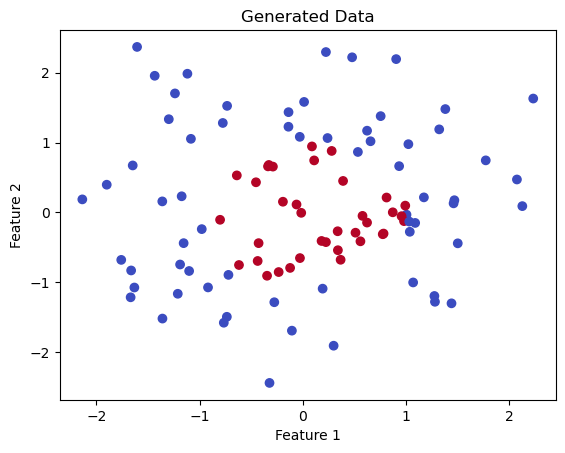

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

# 生成一些数据
n_samples = 100
data = torch.randn(n_samples, 2)
labels = (data[:, 0]**2 + data[:,1]**2 < 1).float().unsqueeze(1)  # 点在圆内为1，圆外为0

#可视化数据
plt.scatter(data[:, 0], data[:, 1], c=labels.squeeze(), cmap='coolwarm')
plt.title("Generated Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [37]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(2, 4)
        self.fc2 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x
model = SimpleNN()

In [39]:
# 定义二分类的损失函数和优化器
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [41]:
# 训练
epochs = 100
for epoch in range(epochs):
    #前向传播
    outputs = model(data)
    loss = criterion(outputs, labels)

    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 每10轮打印一次
    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')

Epoch [10/100], Loss: 0.6724
Epoch [20/100], Loss: 0.6518
Epoch [30/100], Loss: 0.6389
Epoch [40/100], Loss: 0.6301
Epoch [50/100], Loss: 0.6237
Epoch [60/100], Loss: 0.6185
Epoch [70/100], Loss: 0.6141
Epoch [80/100], Loss: 0.6102
Epoch [90/100], Loss: 0.6066
Epoch [100/100], Loss: 0.6033


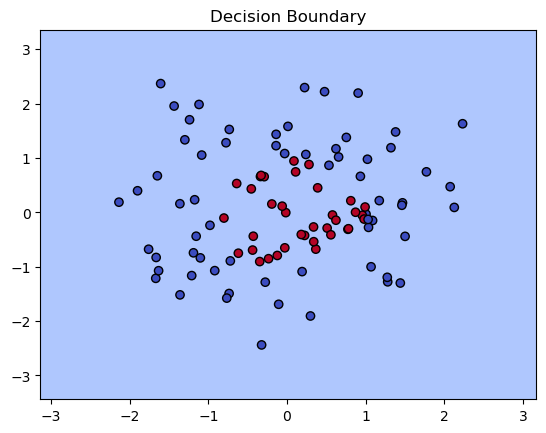

In [45]:
# 可视化决策边界
# 可视化决策边界
def plot_decision_boundary(model, data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = torch.meshgrid(torch.arange(x_min, x_max, 0.1), torch.arange(y_min, y_max, 0.1), indexing='ij')
    grid = torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1)
    predictions = model(grid).detach().numpy().reshape(xx.shape)
    plt.contourf(xx, yy, predictions, levels=[0, 0.5, 1], cmap='coolwarm', alpha=0.7)
    plt.scatter(data[:, 0], data[:, 1], c=labels.squeeze(), cmap='coolwarm', edgecolors='k')
    plt.title("Decision Boundary")
    plt.show()

plot_decision_boundary(model, data)